In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


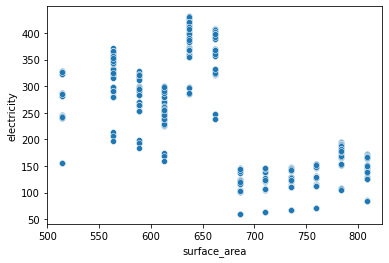

In [4]:
sns.scatterplot(y = Elec['electricity'], x = Elec['surface_area'])
plt.show()

In [5]:
x_train = Elec[['surface_area']]
y_train = Elec[['electricity']]
x_train.shape, y_train.shape

((768, 1), (768, 1))

In [8]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(Model_1.coef_)
print(Model_1.intercept_)

[[-0.75387157]]
[729.4538243]


In [10]:
import numpy as np

y_hat_1 = Model_1.predict(x_train)

Err_1 = np.mean((y_train - y_hat_1)**2)
Err_1

electricity    5763.983779
dtype: float64

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias = False)
PX_5 = poly.fit_transform(x_train)

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

y_hat_5 = Model_5.predict(PX_5)

from sklearn.metrics import mean_squared_error

Err_5 = mean_squared_error(y_train, y_hat_5)
Err_5

4177.726328606076

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree = 9, include_bias=False)
PX_9 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

y_hat_9 = Model_9.predict(PX_9)

from sklearn.metrics import mean_squared_error
Err_9 = mean_squared_error(y_train, y_hat_9)
Err_9


4086.7199908150374

In [14]:
print('1차 : ', Err_1 )
print('5차 : ', Err_5 )
print('9차 : ', Err_9 )

1차 :  electricity    5763.983779
dtype: float64
5차 :  4177.726328606076
9차 :  4086.7199908150374


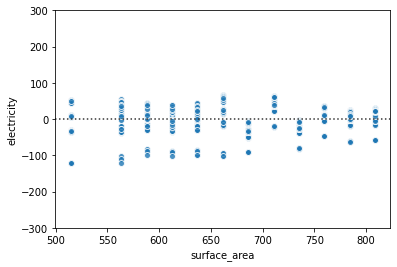

In [17]:
sns.residplot(x=Elec['surface_area'], y=Elec['electricity'],
              order= 9, scatter_kws={'edgecolor':'white'})
plt.ylim(-300,300)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
x_tr, x_te, y_tr, y_te = train_test_split( Elec[['surface_area']], Elec[['electricity']], test_size=0.2, random_state=2045)
print(x_tr)
print(x_te)

     surface_area
555         686.0
355         637.0
200         588.0
669         808.5
561         735.0
..            ...
25          686.0
410         686.0
521         784.0
398         612.5
202         588.0

[614 rows x 1 columns]
     surface_area
414         710.5
475         784.0
511         710.5
213         661.5
339         514.5
..            ...
538         588.0
467         735.0
489         588.0
767         808.5
576         514.5

[154 rows x 1 columns]


In [24]:
x_tr.shape, x_te.shape

((614, 1), (154, 1))

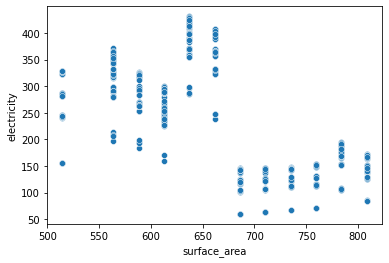

In [29]:
sns.scatterplot(x=x_tr['surface_area'], y=y_tr['electricity'])
plt.show()

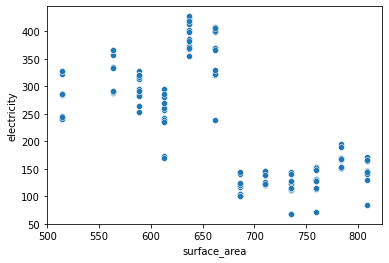

In [30]:
sns.scatterplot(x=x_te['surface_area'],y=y_te['electricity'])
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_tr, y_tr)

y_hat_1 = Model_1.predict(x_te)

from sklearn.metrics import mean_squared_error
Err_1 = mean_squared_error(y_te, y_hat_1)
Err_1

6044.176547629271

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree=5, include_bias=False)
PX_5 = poly.fit_transform(x_tr)

from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_tr)

PX_5_te = poly.fit_transform(x_te)
y_hat_5 = Model_5.predict(PX_5_te)

from sklearn.metrics import mean_squared_error
Err_5 = mean_squared_error(y_te, y_hat_5)
Err_5


4330.604566409499

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(x_tr)

from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_tr)

PX_9_te = poly.fit_transform(x_te)
y_hat_9 = Model_9.predict(PX_9_te)

from sklearn.metrics import mean_squared_error

Err_9 = mean_squared_error(y_te, y_hat_9)
Err_9


4238.689067137633

6:3:1

In [36]:
from sklearn.model_selection import train_test_split

x_remain, x_te, y_remain, y_te = train_test_split(Elec[['surface_area']], Elec[['electricity']], test_size=int(len(Elec) *0.1), random_state=2045)
print(x_remain.shape, y_remain.shape)
print(x_te.shape, y_te.shape)

(692, 1) (692, 1)
(76, 1) (76, 1)


In [38]:
from sklearn.model_selection import train_test_split

x_tr, x_vd, y_tr, y_vd = train_test_split(x_remain[['surface_area']], y_remain[['electricity']], test_size=int(len(Elec)*0.3), random_state=2045)
print(x_tr.shape, y_tr.shape)
print(x_vd.shape, y_vd.shape)
print(x_te.shape, y_te.shape)

(462, 1) (462, 1)
(230, 1) (230, 1)
(76, 1) (76, 1)


In [40]:
from sklearn.linear_model import LinearRegression

Mode_1 = LinearRegression()
Model_1.fit(x_tr, y_tr)

y_hat_1 = Model_1.predict(x_vd)

from sklearn.metrics import mean_squared_error

vd_Err_1 = mean_squared_error(y_vd, y_hat_1)
vd_Err_1

5996.991718116083

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree = 5, include_bias=False)
PX_5 = poly.fit_transform(x_tr)

from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_tr)

PX_5_vd = poly.fit_transform(x_vd)
y_hat_5 = Model_5.predict(PX_5_vd)

from sklearn.metrics import mean_squared_error

vd_Err_5 = mean_squared_error(y_vd, y_hat_5)
vd_Err_5

4429.910621940308

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(x_tr)

from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_tr)

PX_9_vd = poly.fit_transform(x_vd)
y_hat_9 = Model_9.predict(PX_9_vd)

from sklearn.metrics import mean_squared_error

vd_Err_9 = mean_squared_error(y_vd, y_hat_9)
vd_Err_9

4306.598675776518

In [43]:
print('1차 MSE : ', vd_Err_1)
print('5차 MSE : ', vd_Err_5)
print('9차 MSE : ', vd_Err_9)

1차 MSE :  5996.991718116083
5차 MSE :  4429.910621940308
9차 MSE :  4306.598675776518


In [44]:
PX_9_te = poly.fit_transform(x_te)

mean_squared_error(y_te, Model_9.predict(PX_9_te))

5194.887655342146